<img align = 'right' src="https://snz04pap002files.storage.live.com/y4mETa6NsFO7yzYkSU7cNPMTTJ-h9UshsM2vHgfrRK9rU3qMgSdgkDmnBUo6xfcdD8cdBLoh5D6LeaqxuNZzDFi8y5ZzVV_aFHDESSZzzjrRxzFGhBgtMIWPNCAvVEXrHGOOVUaEvTa5QVA-ezV48GoZwj_1FcBOsmH6T52dJC7BBM?width=318&height=111&cropmode=none" width="318" height="111" />
<br></br><br></br><br></br>

<p style="text-align:left;"><font size='8'><b> Midterm Project </b></font></p>

<p style="text-align:left;"><font size='4'><b> Classification - Life Insurance Assessment </b></font></p>

<h2>&#9635; Importing Modules</h2>

In [2]:
import pandas as pd
import numpy as np

#Graphic libraries
import matplotlib
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
%matplotlib inline

#sklearn modules 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

<h2>&#9635; Reading data</h2>

In [3]:
train_df_raw = pd.read_csv('train.csv')
test_df_raw = pd.read_csv('test.csv')

In [3]:
train_df_raw.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

In [4]:
train_df_raw.shape

(59381, 128)

In [16]:
train_df_raw.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   59381 non-null  int64  
 1   Product_Info_1       59381 non-null  int64  
 2   Product_Info_2       59381 non-null  object 
 3   Product_Info_3       59381 non-null  int64  
 4   Product_Info_4       59381 non-null  float64
 5   Product_Info_5       59381 non-null  int64  
 6   Product_Info_6       59381 non-null  int64  
 7   Product_Info_7       59381 non-null  int64  
 8   Ins_Age              59381 non-null  float64
 9   Ht                   59381 non-null  float64
 10  Wt                   59381 non-null  float64
 11  BMI                  59381 non-null  float64
 12  Employment_Info_1    59362 non-null  float64
 13  Employment_Info_2    59381 non-null  int64  
 14  Employment_Info_3    59381 non-null  int64  
 15  Employment_Info_4    52602 non-null

In [5]:
test_df_raw.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   1               1             D3              26        0.487179   
1   3               1             A2              26        0.076923   
2   4               1             D3              26        0.144667   
3   9               1             A1              26        0.151709   
4  12               1             A1              26        0.076923   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               3               1  0.611940  0.781818  ...   
1               2               3               1  0.626866  0.727273  ...   
2               2               3               1  0.582090  0.709091  ...   
3               2               1               1  0.522388  0.654545  ...   
4               2               3               1  0.298507  0.672727  ...   

   Medical_Keyword_39  Medical_Keyword_40  Medical_Keyword_41  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_42  Medical_Keyword_43  Medical_Keyword_44  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_45  Medical_Keyword_46  Medical_Keyword_47  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   1   
4                   0                   0                   0   

   Medical_Keyword_48  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0  

[5 rows x 127 columns]

In [6]:
test_df_raw.shape

(19765, 127)

<h2>&#9635; Target variable: Analysis</h2>

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

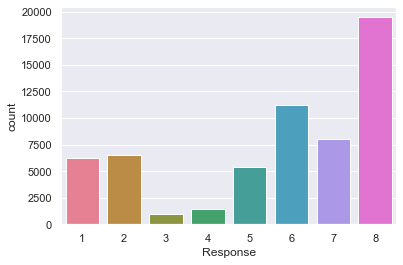

In [149]:
target = train_df_raw[['Response']]
sns.set(style="darkgrid")
sns.countplot(target['Response'], palette="husl")
#Response 8 has highest values and 3 and 4 have the least, and oversampling could be performed to balance the data 
pd.Series(target['Response']).value_counts()

<h2>&#9635; First cleaning of training set</h2>

In [6]:
drop_list = ['Id','Response']
train_df = train_df_raw.drop(drop_list,axis=1)

<h2>&#9635; Analysis of categorical features</h2>

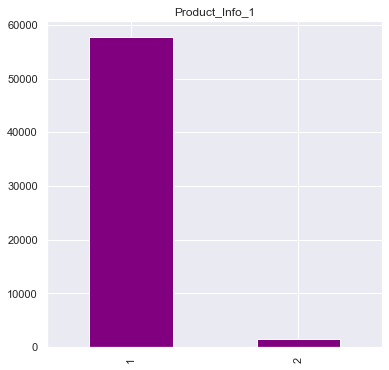

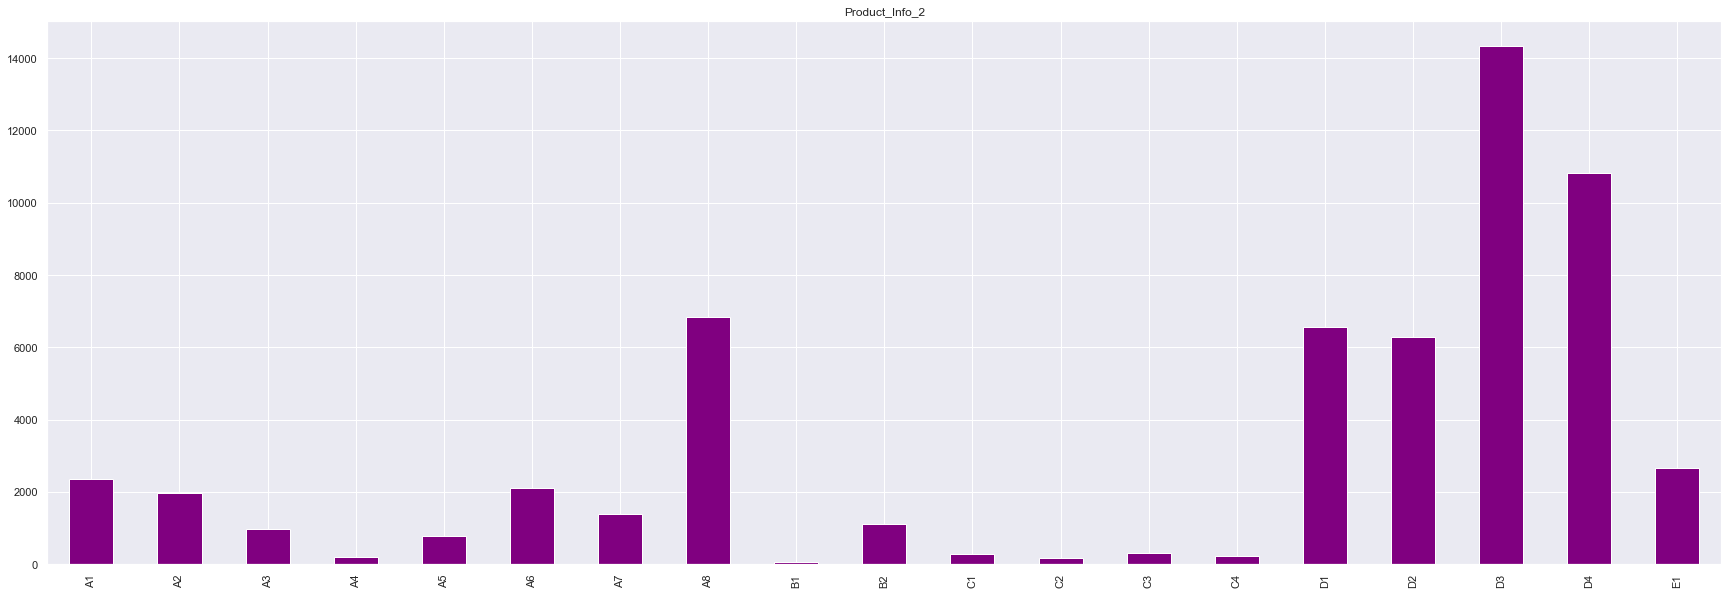

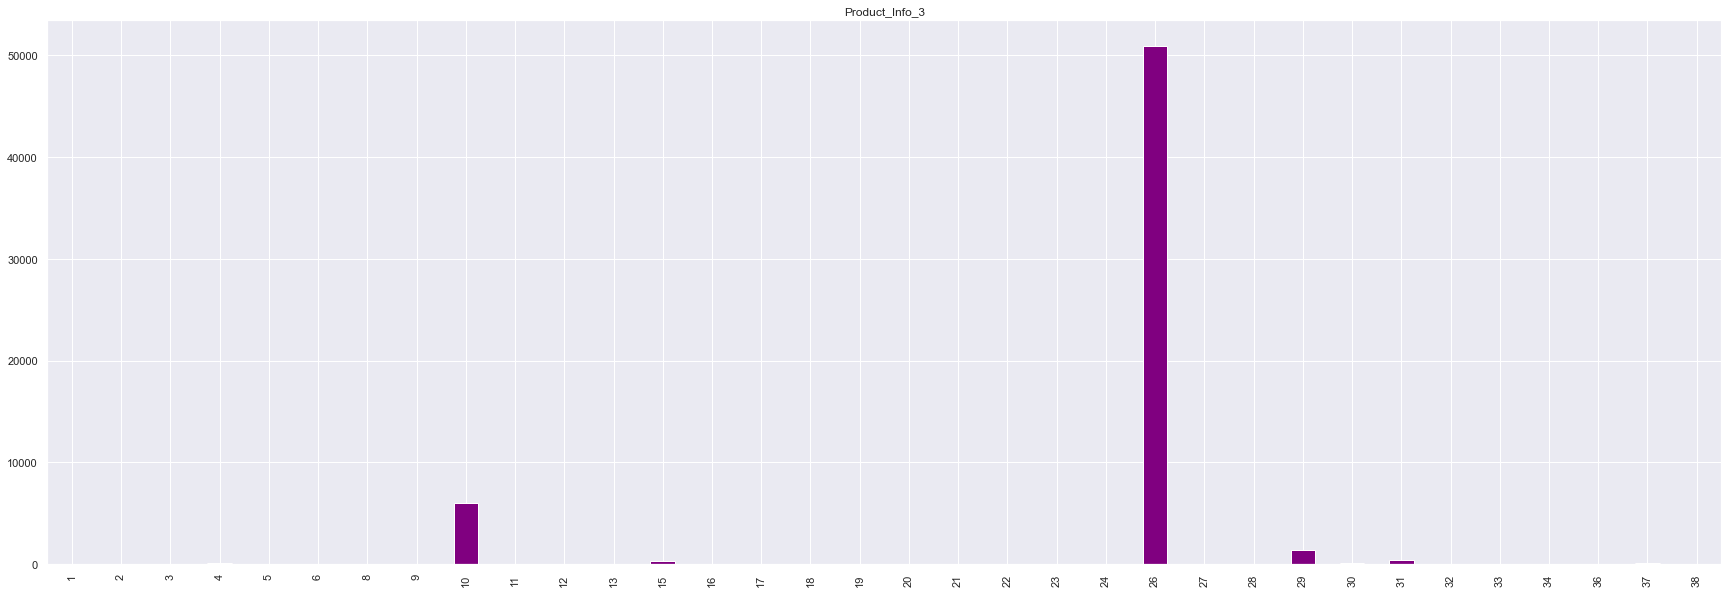

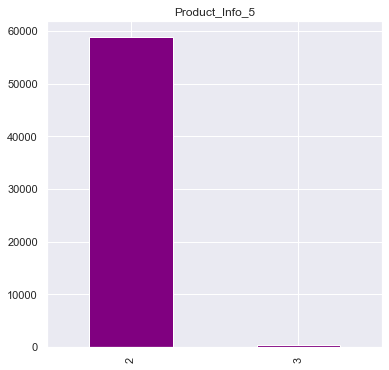

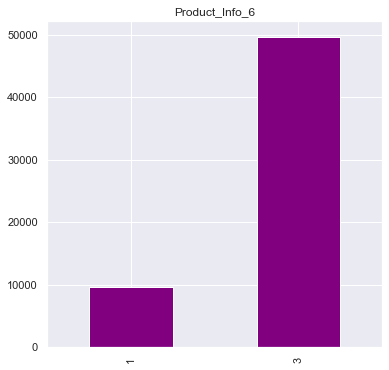

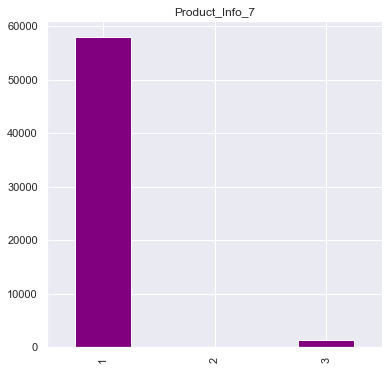

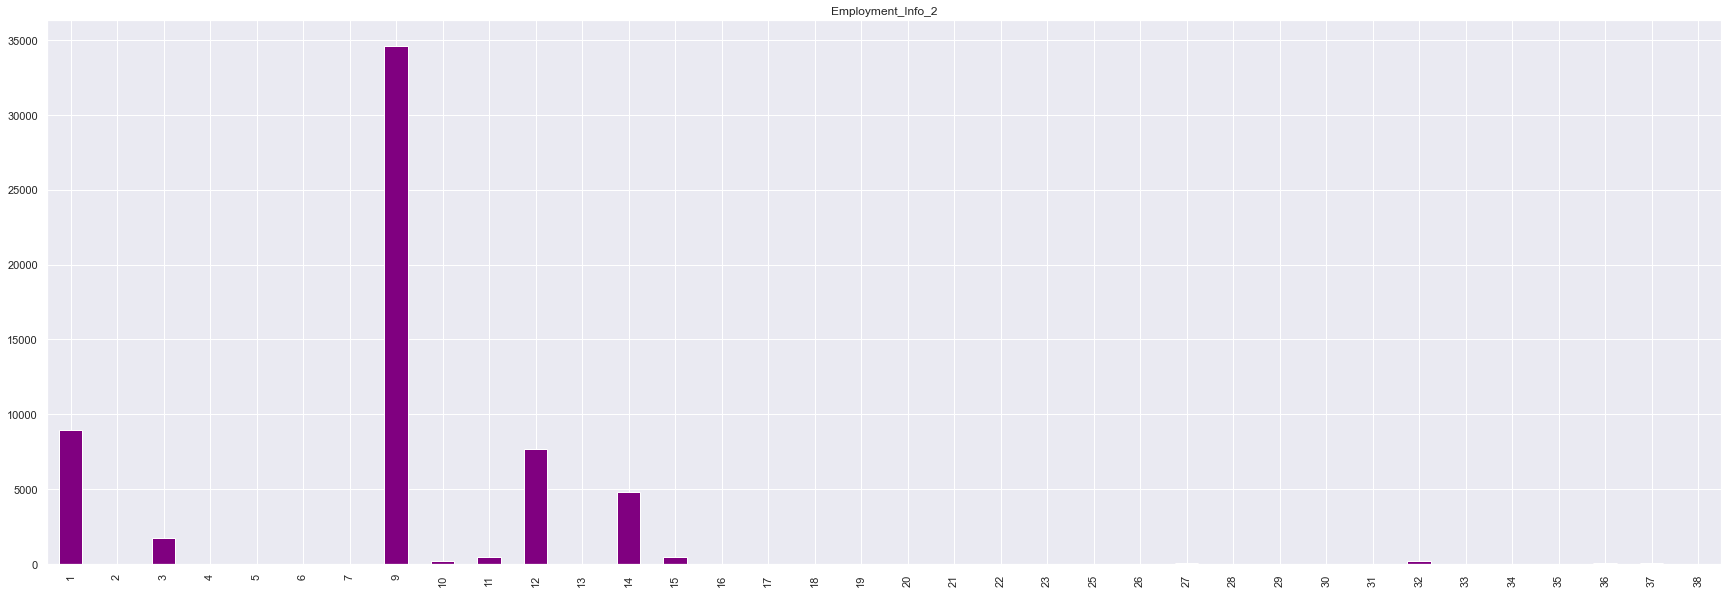

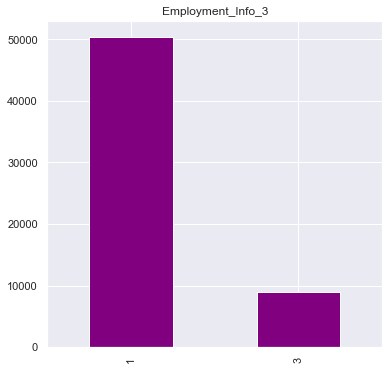

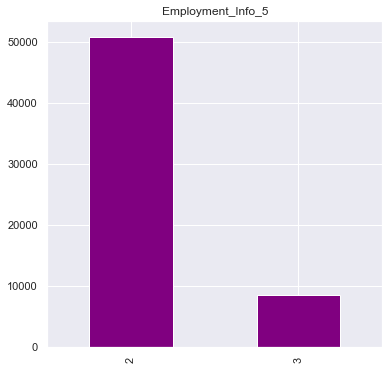

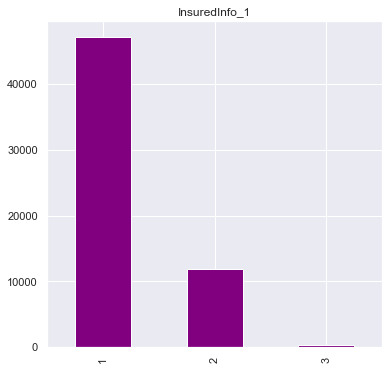

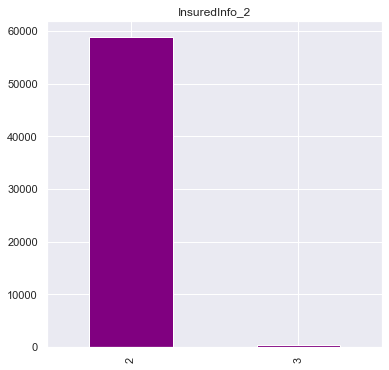

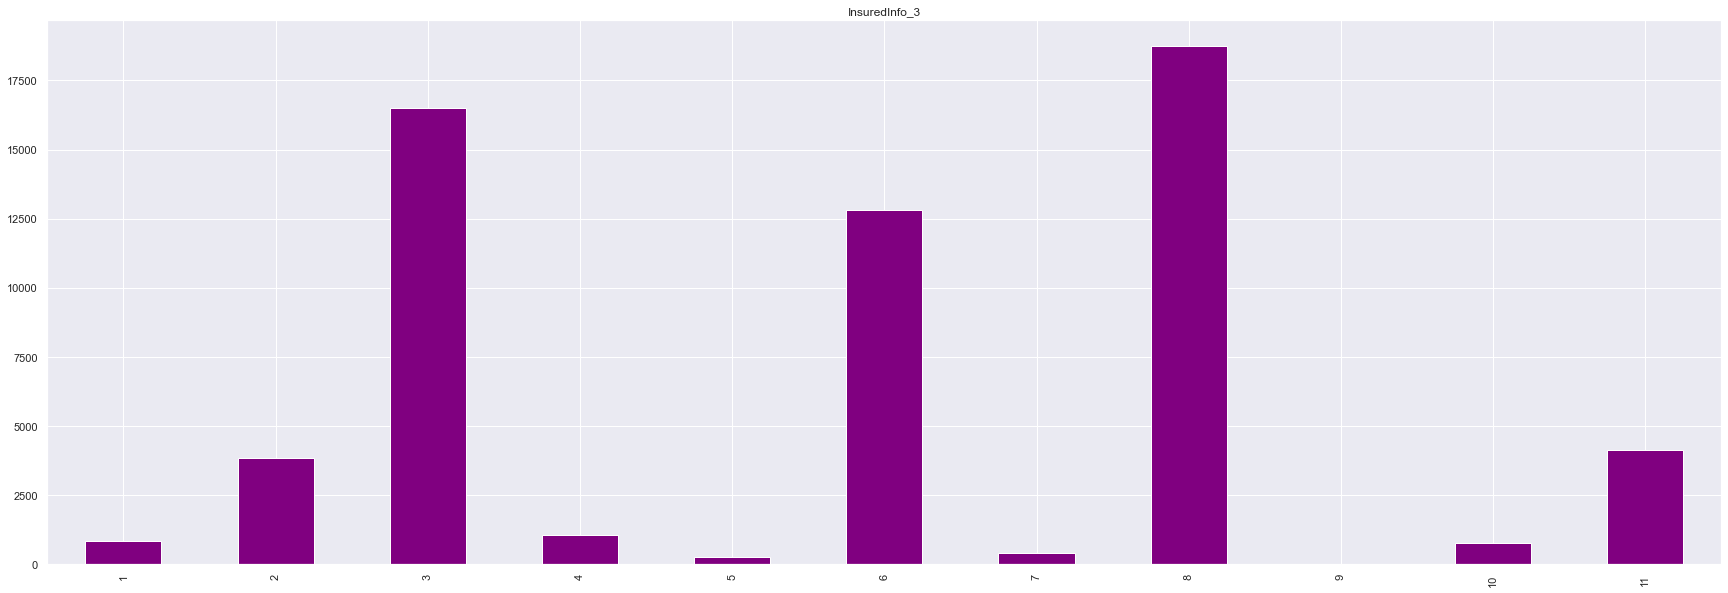

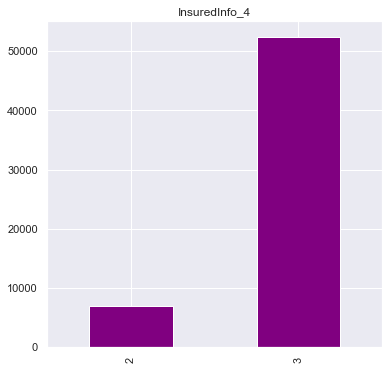

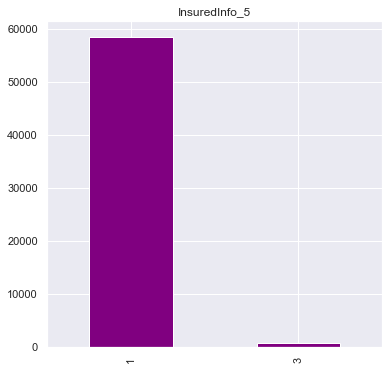

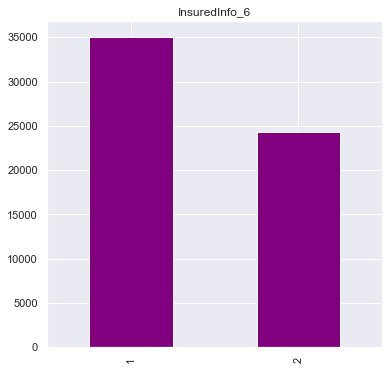

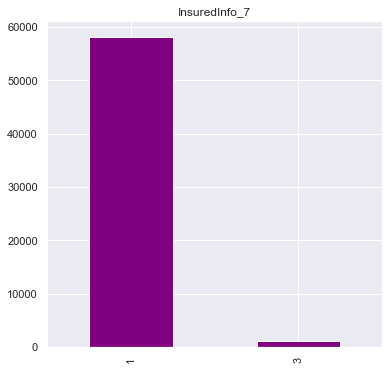

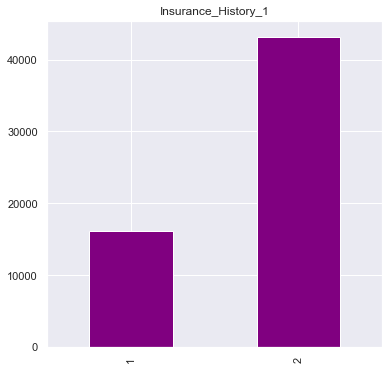

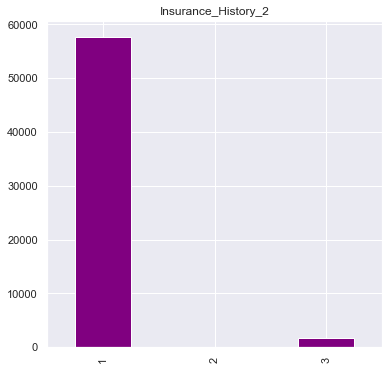

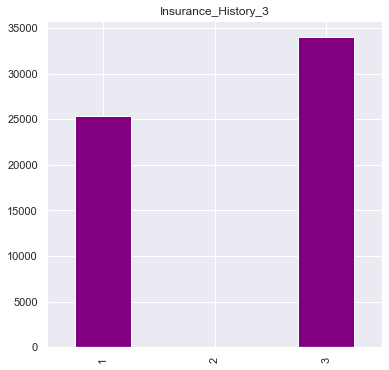

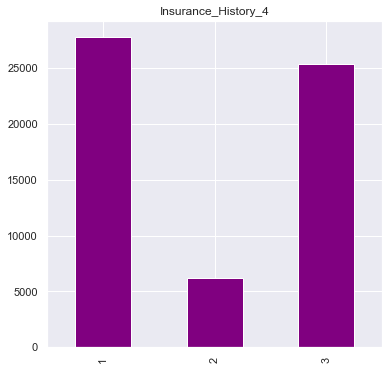

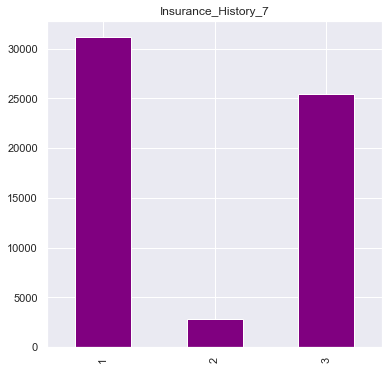

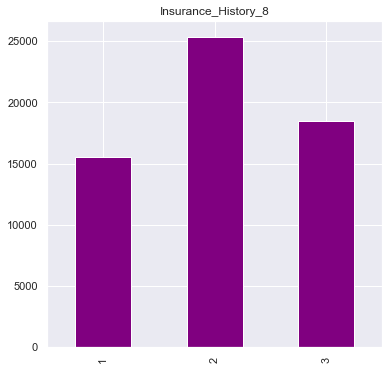

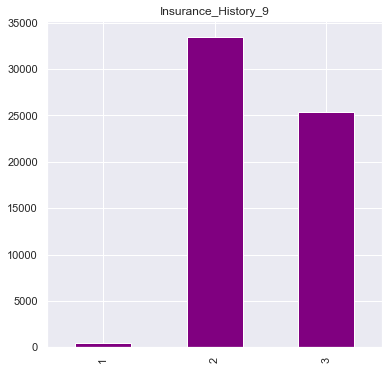

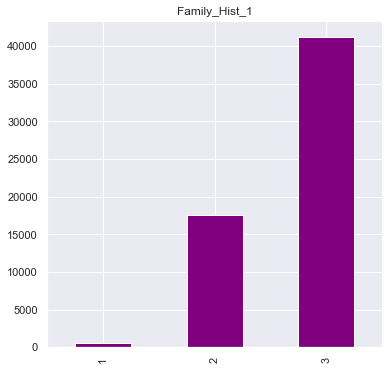

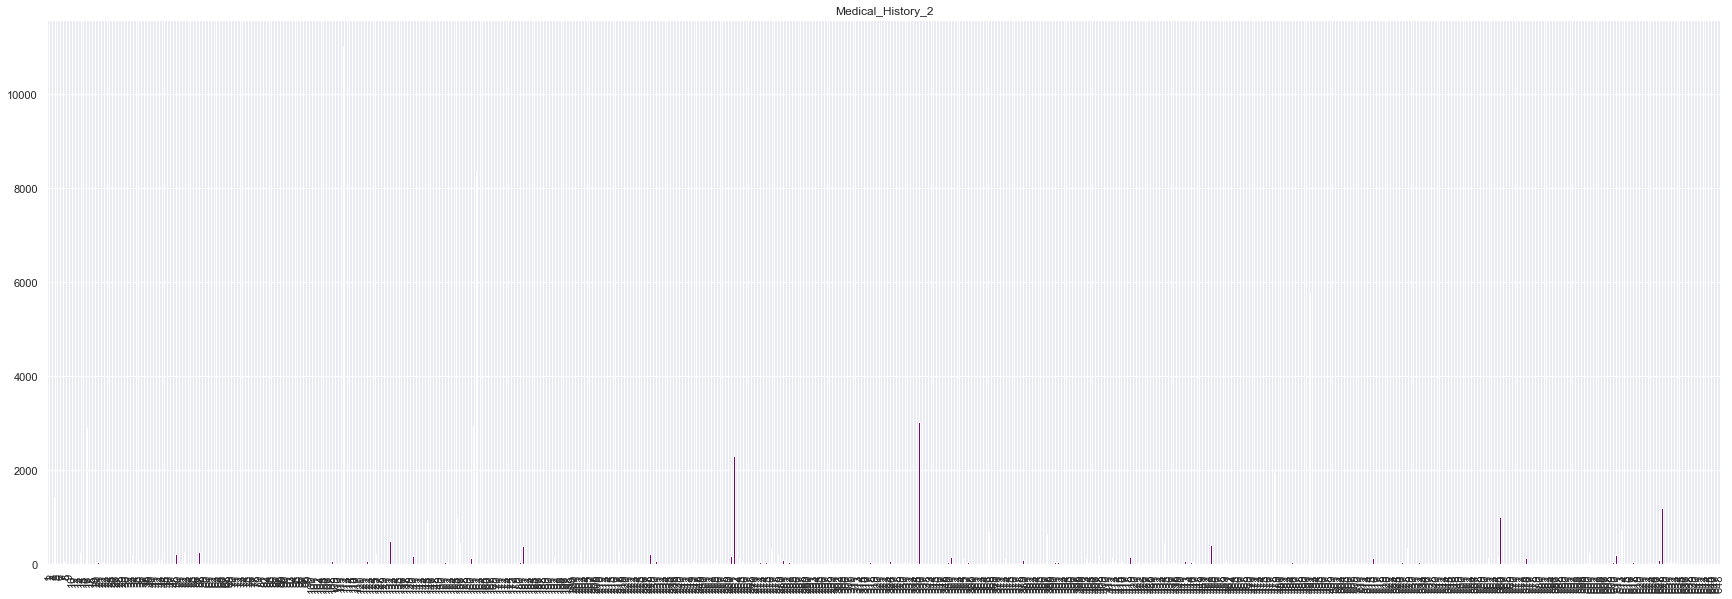

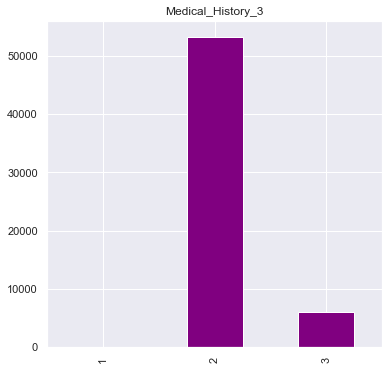

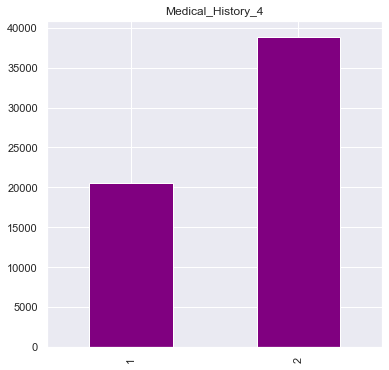

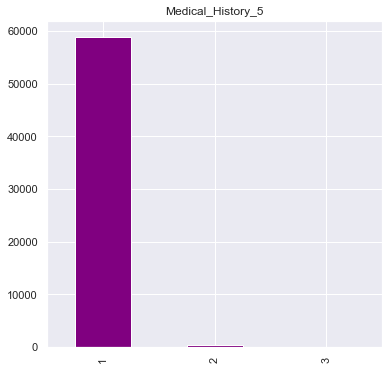

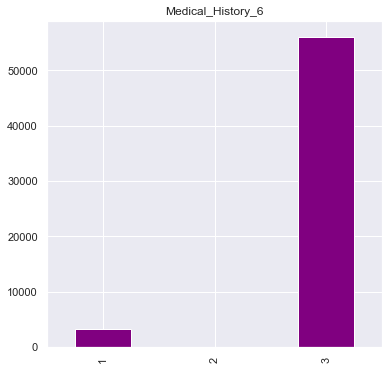

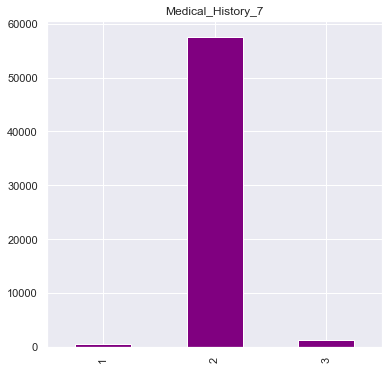

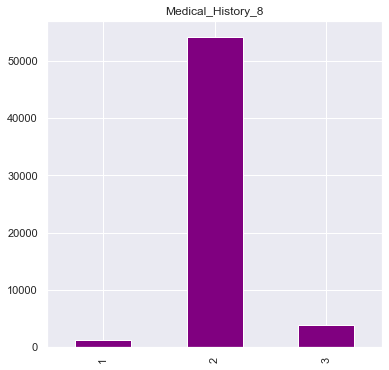

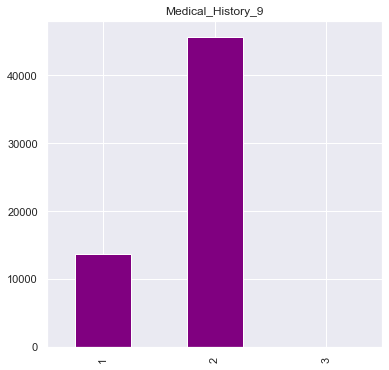

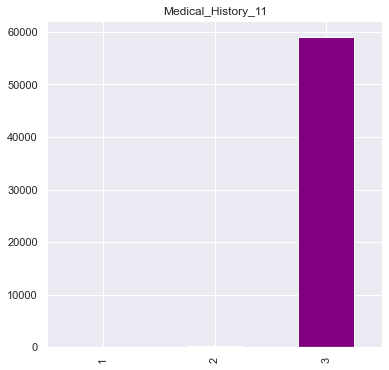

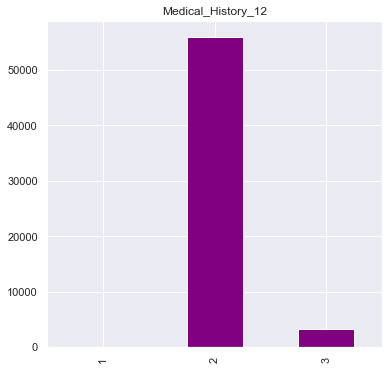

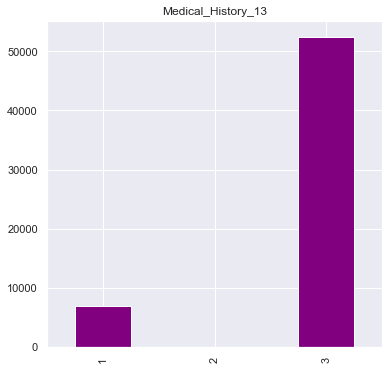

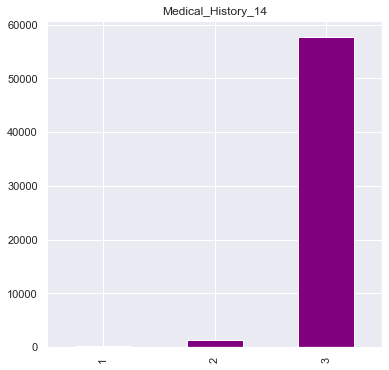

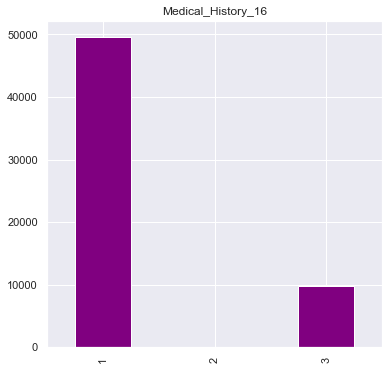

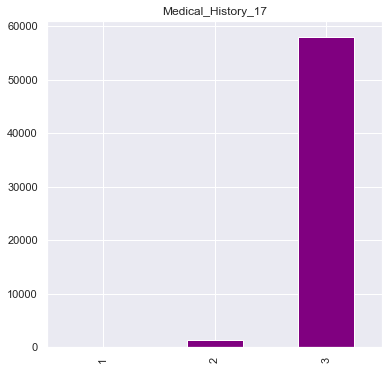

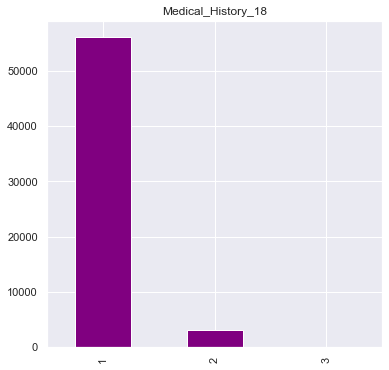

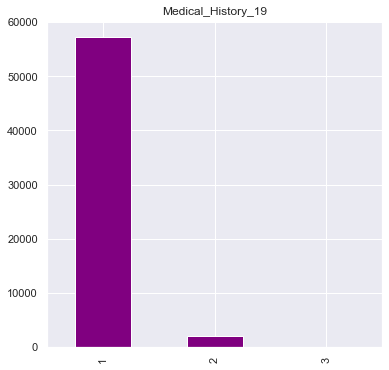

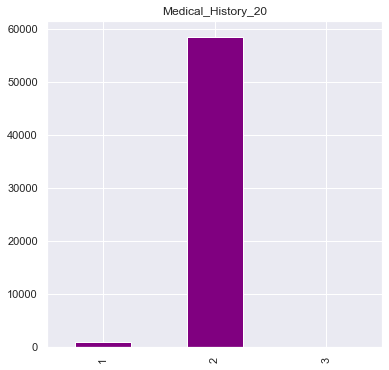

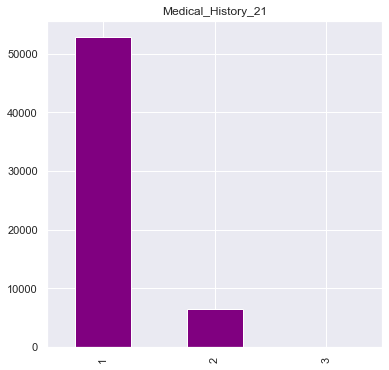

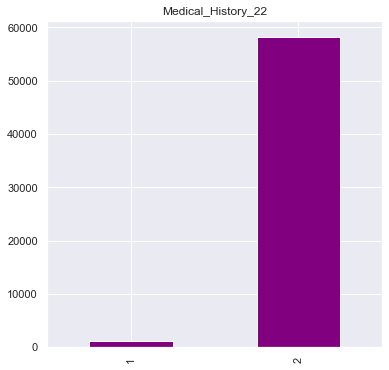

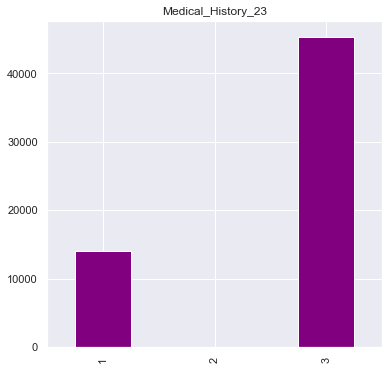

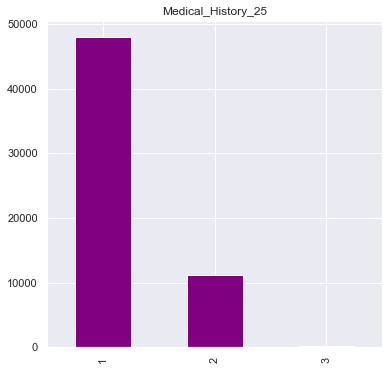

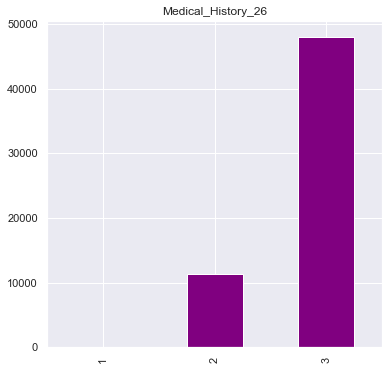

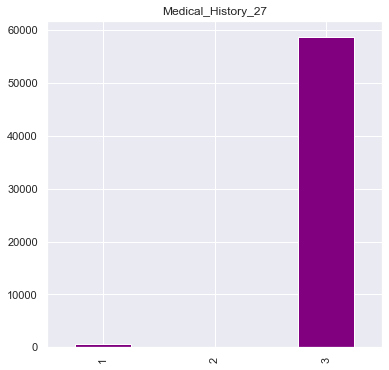

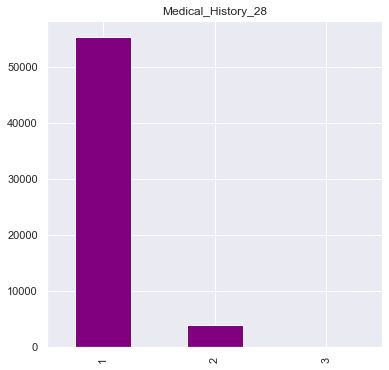

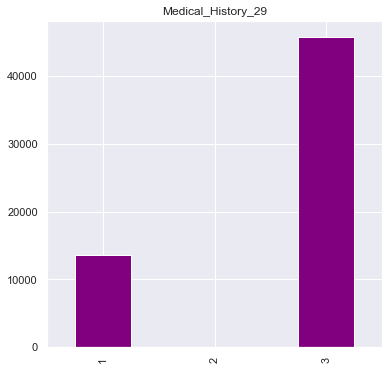

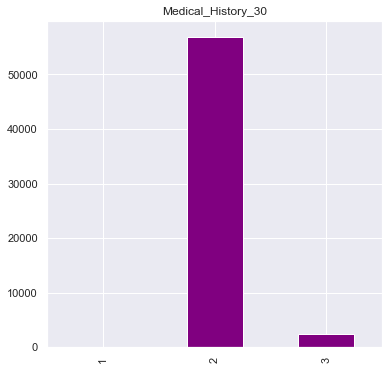

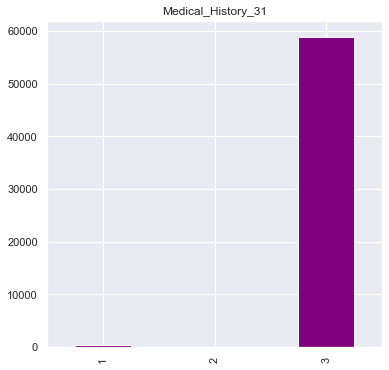

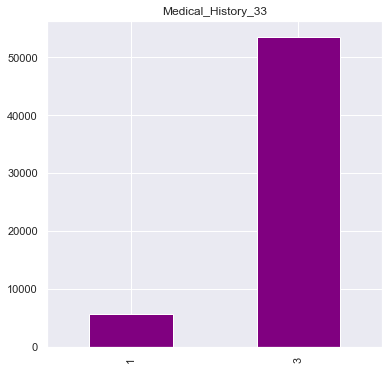

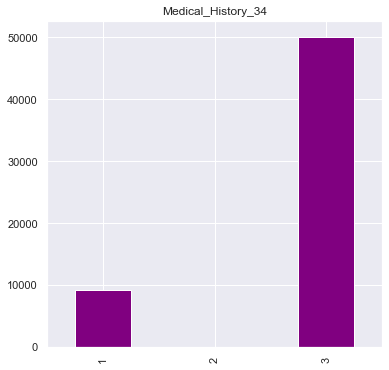

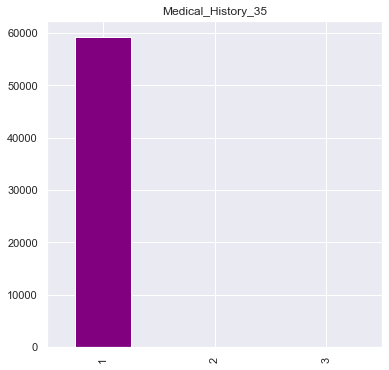

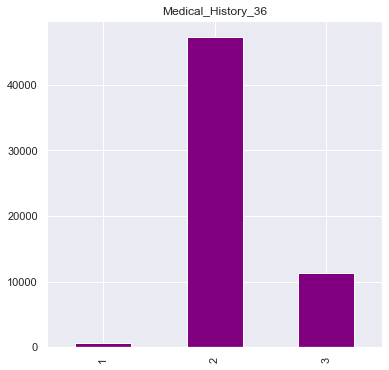

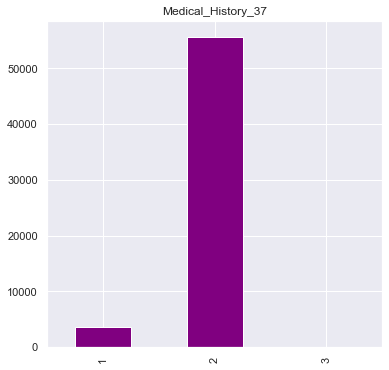

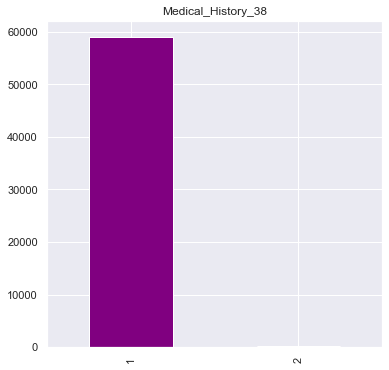

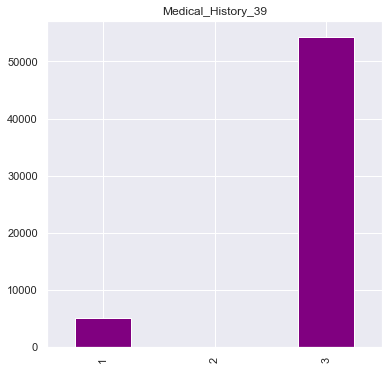

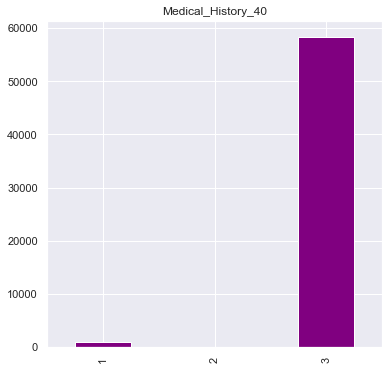

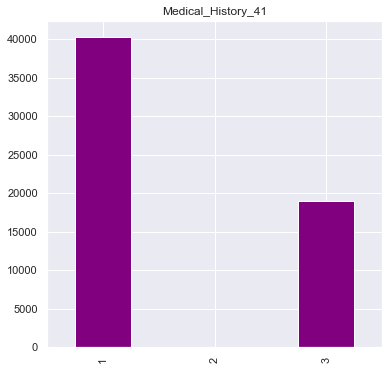

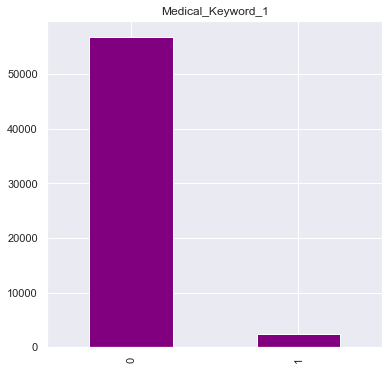

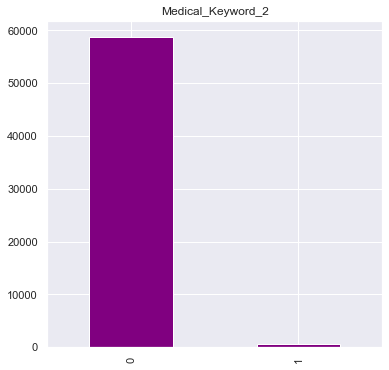

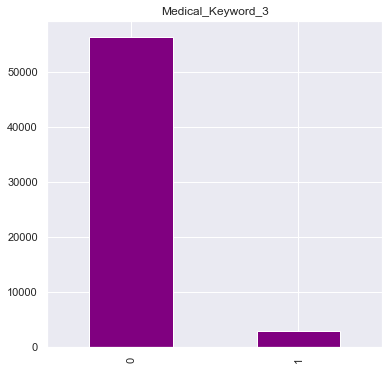

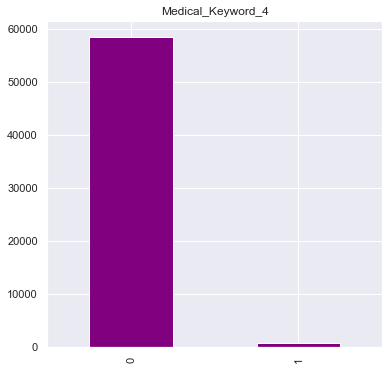

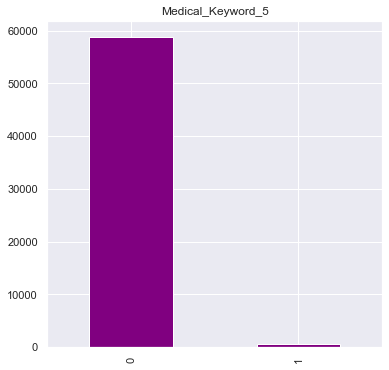

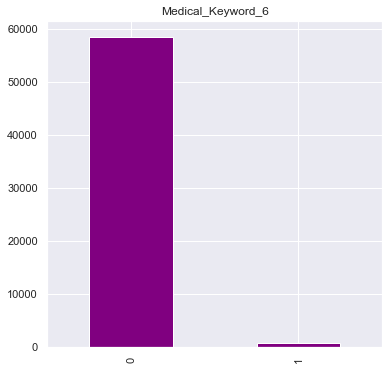

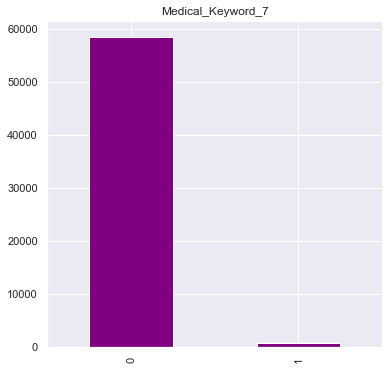

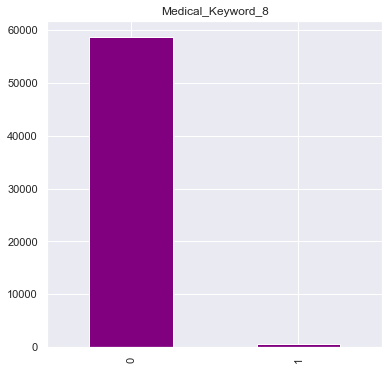

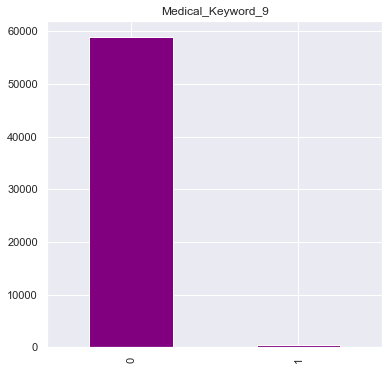

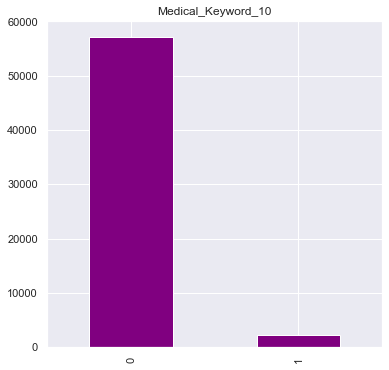

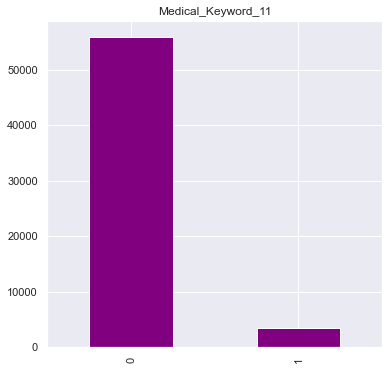

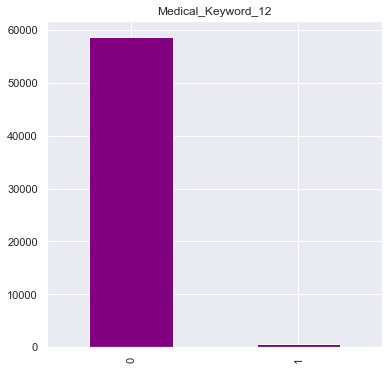

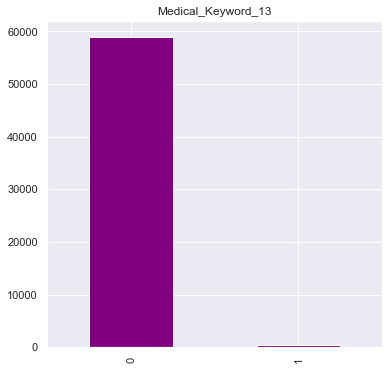

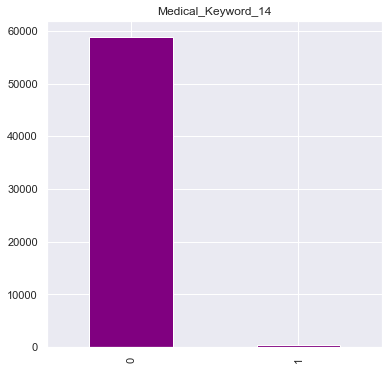

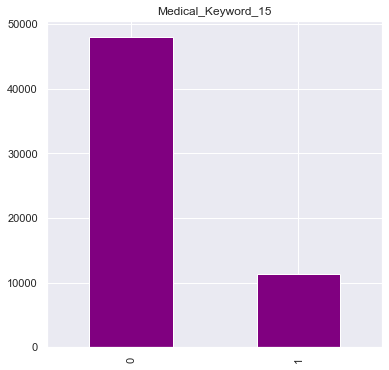

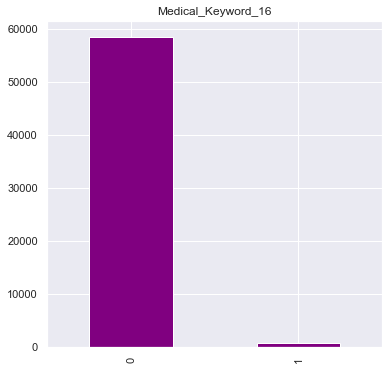

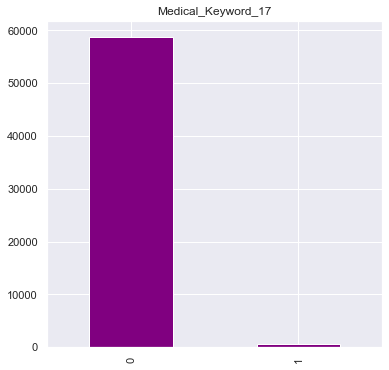

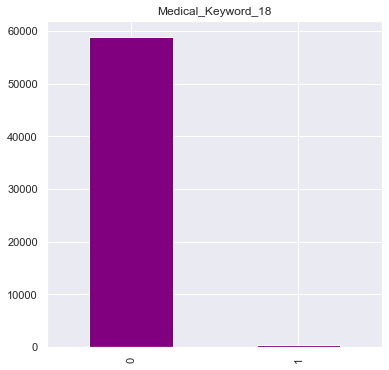

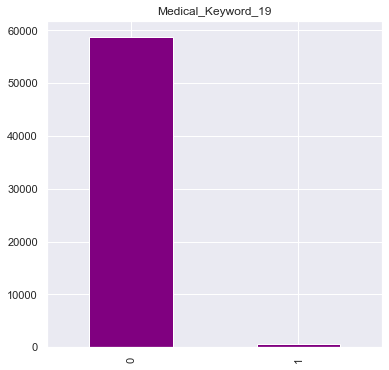

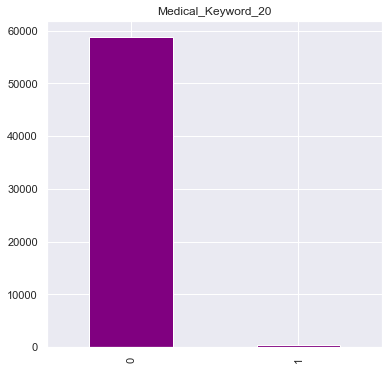

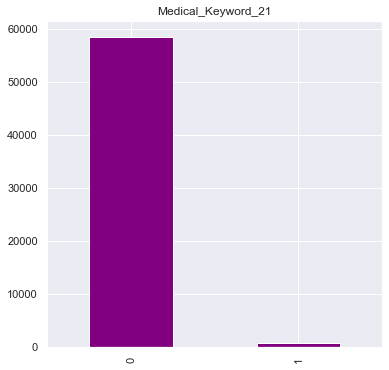

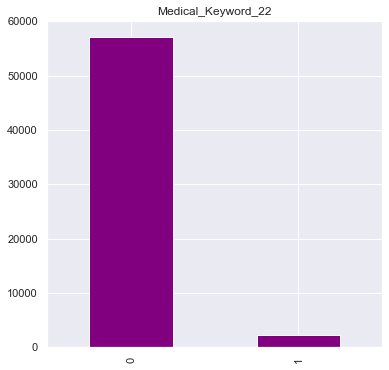

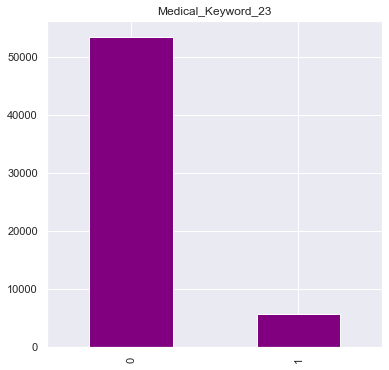

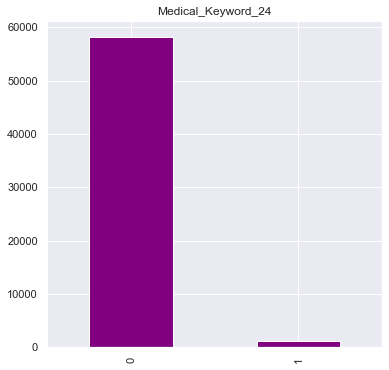

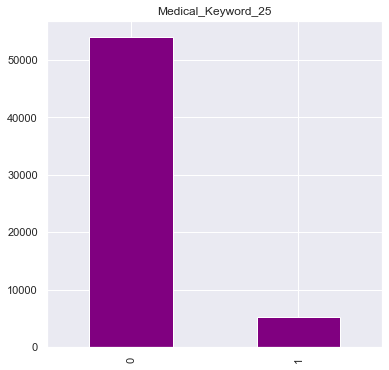

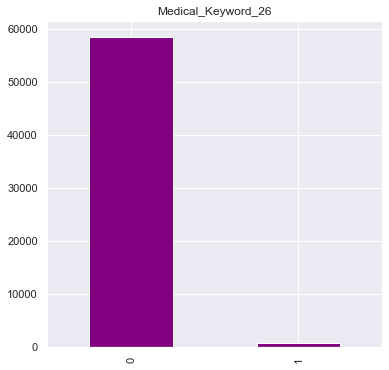

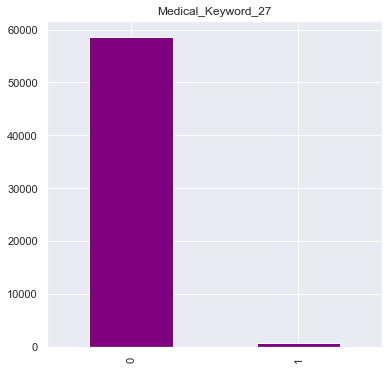

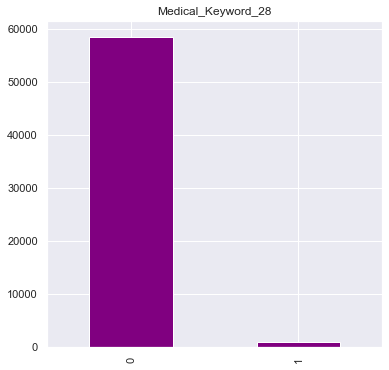

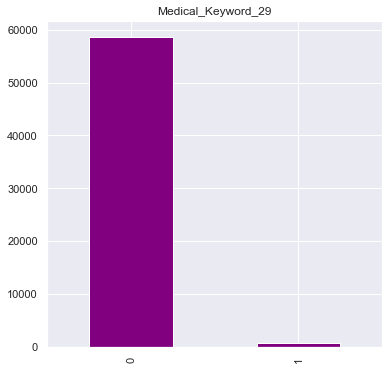

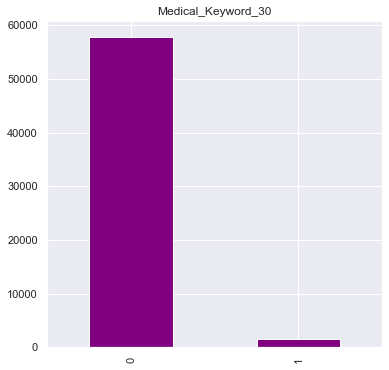

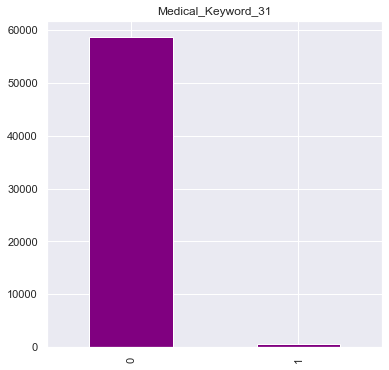

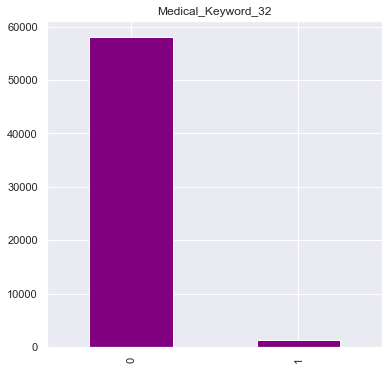

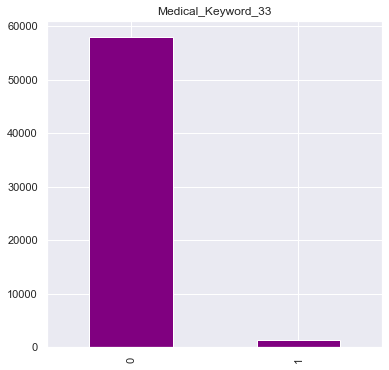

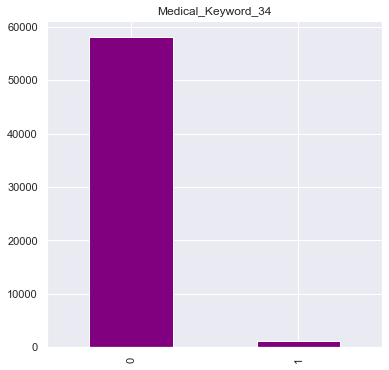

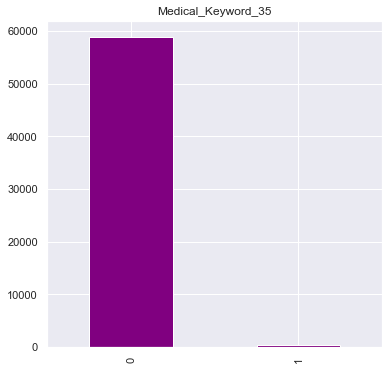

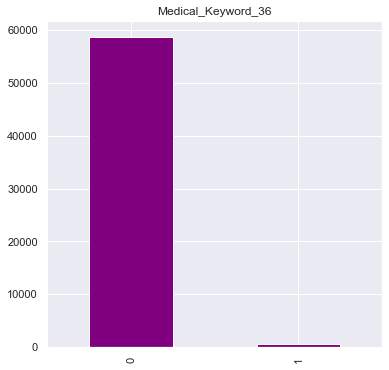

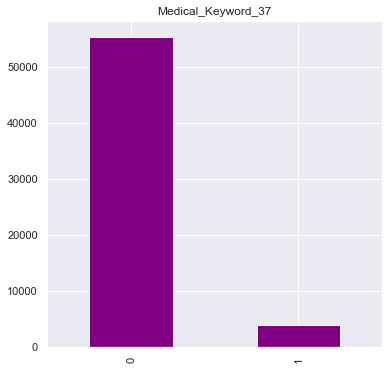

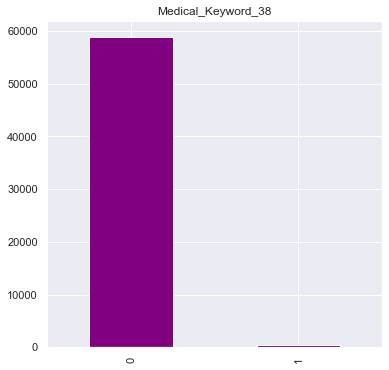

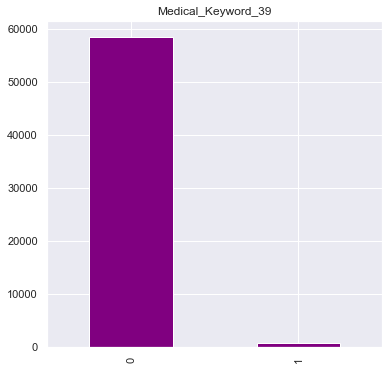

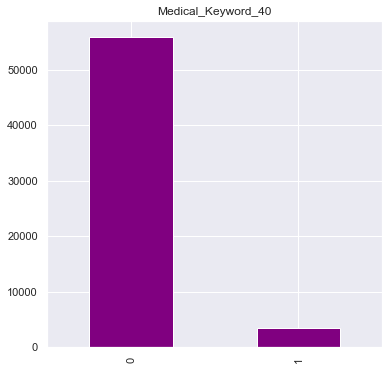

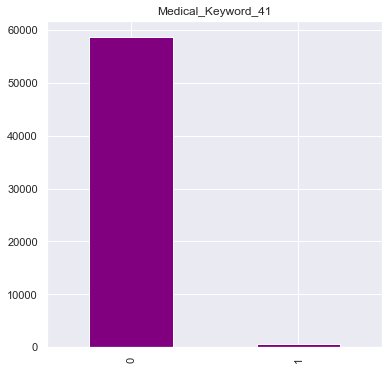

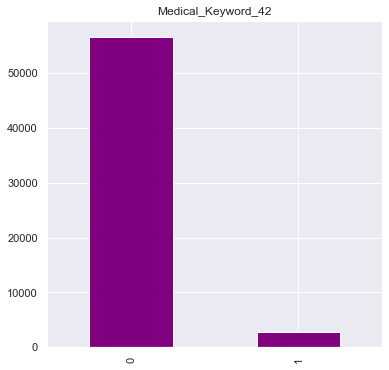

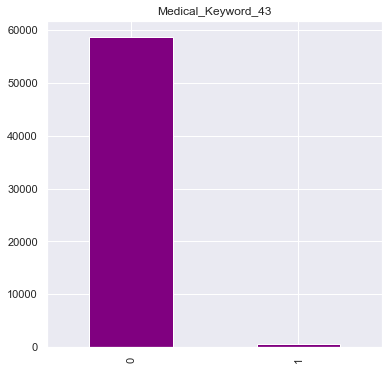

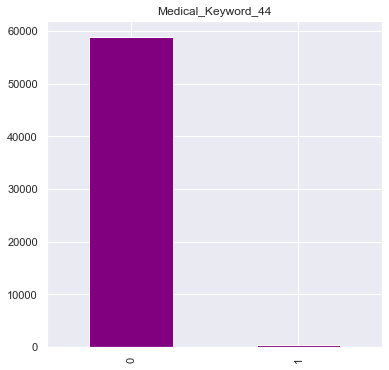

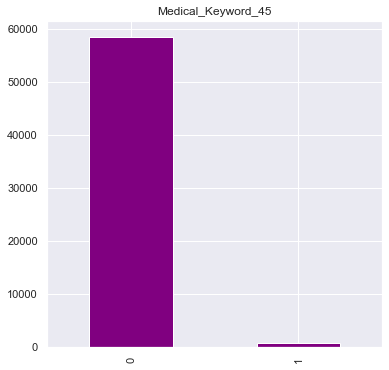

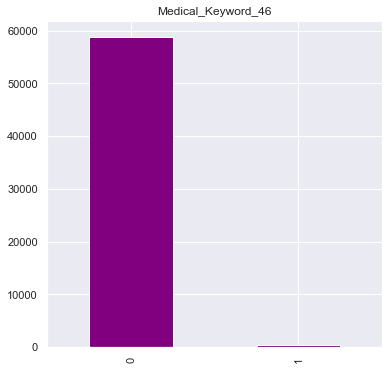

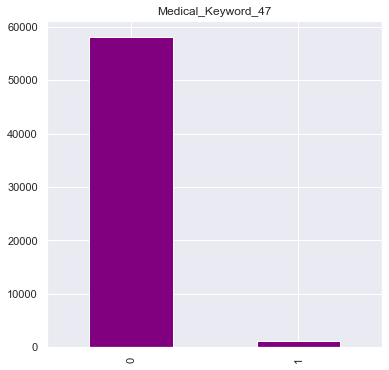

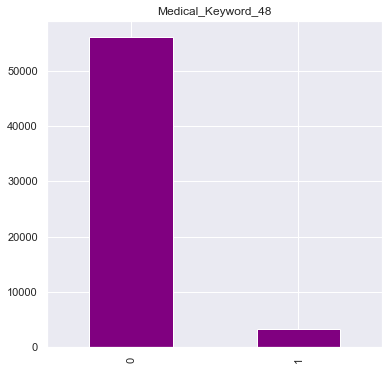

In [58]:
#Make a dataframe that just contains categorical features
categeorical_features = [category for category in train_df.columns if train_df[category].dtype != 'float64']
#print frequencies for each nominal value of each feature
for col in categeorical_features:
    if len(pd.Series(train_df[col]).value_counts()) > 10:
        fig = plt.figure(figsize=(30, 10))
        pd.Series(train_df[col]).value_counts().sort_index().plot(kind='bar',title = col,color="purple")
    else:
        fig = plt.figure(figsize=(6, 6))
        pd.Series(train_df[col]).value_counts().sort_index().plot(kind='bar',title = col,color="purple")
    plt.show()   

<h2>&#9635; Analysis of numerical features</h2>

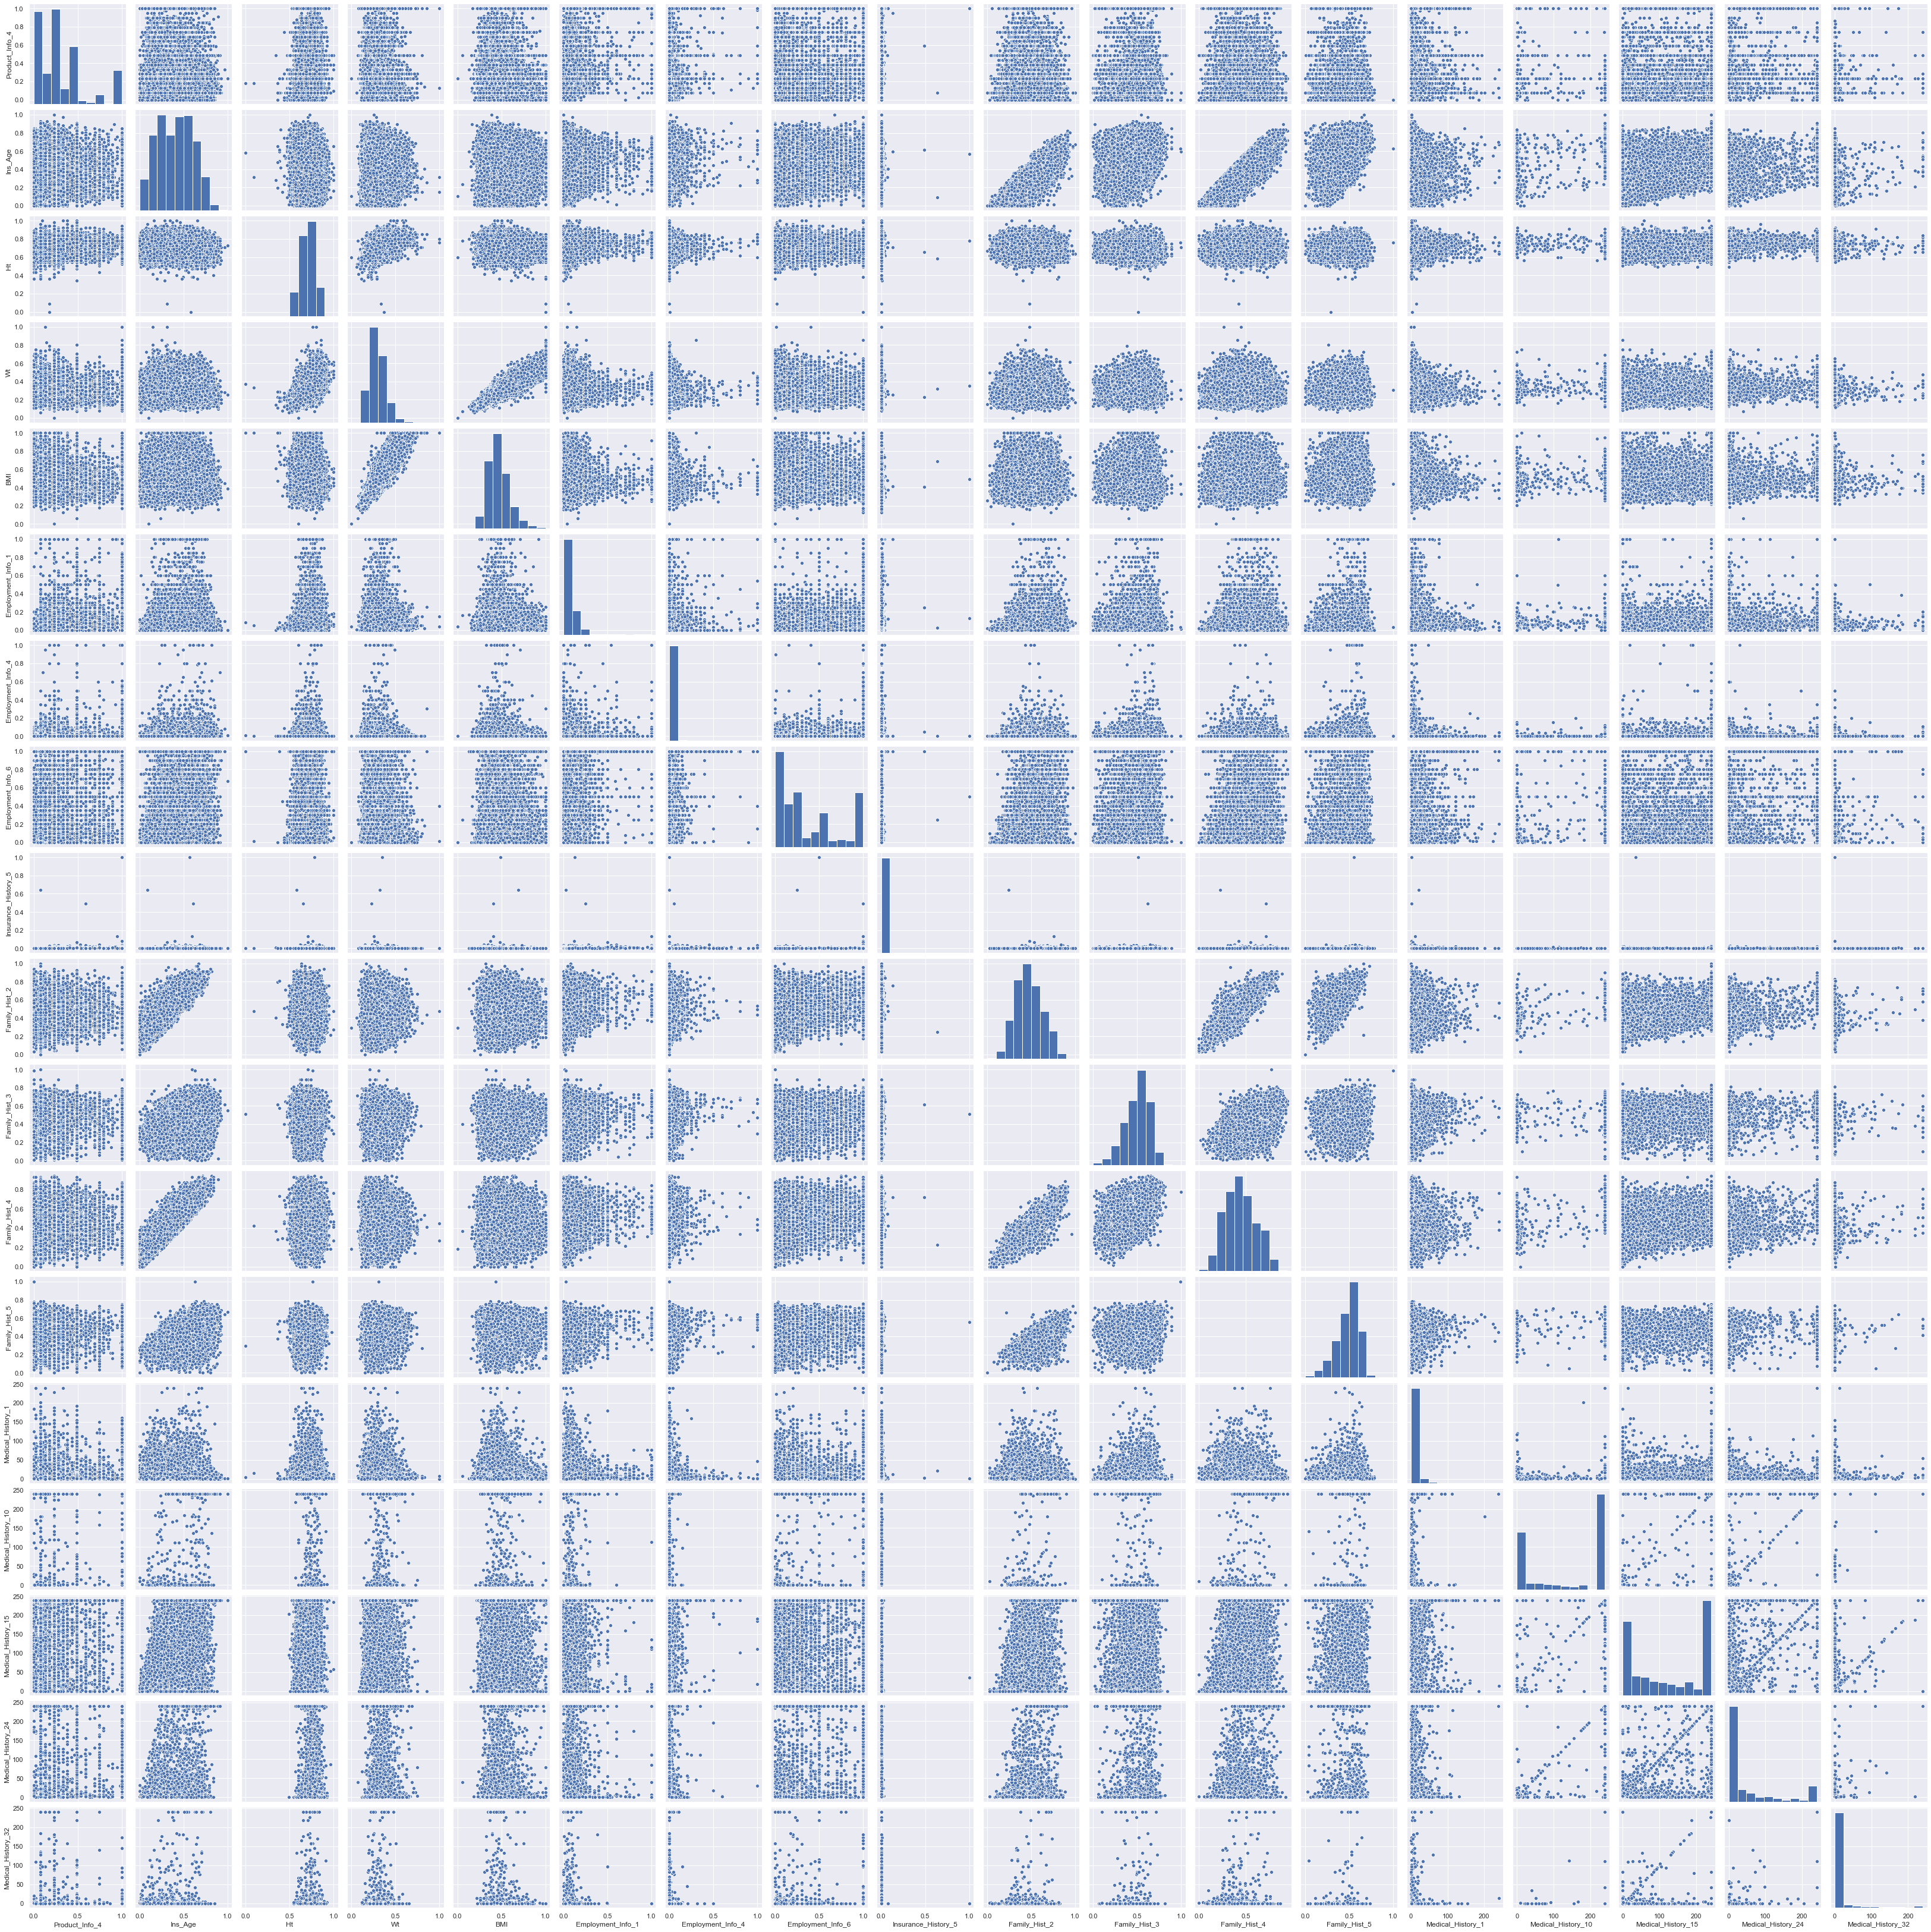

In [73]:
#Make a dataframe that just contains categorical features
numerical_columns = [category for category in train_df.columns if train_df[category].dtype == 'float64']
numerical_features = train_df[numerical_columns]
#print frequencies for each nominal value of each feature
sns.pairplot(numerical_features)

<h2>&#9635; Remove features without enough information</h2>

In [7]:
#find features with too many null values (at least 50%)
features_with_null_values = train_df.isnull().sum()/len(train_df)
print(features_with_null_values[features_with_null_values > 0.5].sort_values(ascending=False))

Medical_History_10    0.990620
Medical_History_32    0.981358
Medical_History_24    0.935990
Medical_History_15    0.751015
Family_Hist_5         0.704114
Family_Hist_3         0.576632
dtype: float64


In [8]:
empty_features = list(features_with_null_values[features_with_null_values > 0.5].index)
empty_features

['Family_Hist_3',
 'Family_Hist_5',
 'Medical_History_10',
 'Medical_History_15',
 'Medical_History_24',
 'Medical_History_32']

In [8]:
# Dropping all columns in which greater than 50 percent null values
train_df = train_df.drop(empty_features,axis=1)
train_df.head()

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0               1             D3              10        0.076923   
1               1             A1              26        0.076923   
2               1             E1              26        0.076923   
3               1             D4              10        0.487179   
4               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.641791  0.581818   
1               2               3               1  0.059701  0.600000   
2               2               3               1  0.029851  0.745455   
3               2               3               1  0.164179  0.672727   
4               2               3               1  0.417910  0.654545   

         Wt  ...  Medical_Keyword_39  Medical_Keyword_40  Medical_Keyword_41  \
0  0.148536  ...                   0                   0                   0   
1  0.131799  ...                   0                   0                   0   
2  0.288703  ...                   0                   0                   0   
3  0.205021  ...                   0                   0                   0   
4  0.234310  ...                   0                   0                   0   

   Medical_Keyword_42  Medical_Keyword_43  Medical_Keyword_44  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_45  Medical_Keyword_46  Medical_Keyword_47  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_48  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 120 columns]

<h2>&#9635; Features Correlation</h2>

In [31]:
#Correlation between features could help to decide wich model suits best
corr = train_df.corr()
#Just show correlation above 60% 
corr_above_60 = corr[corr >= 0.6]
corr_above_60

Product_Info_1  Product_Info_3  Product_Info_4  \
Product_Info_1                 1.0             NaN             NaN   
Product_Info_3                 NaN             1.0             NaN   
Product_Info_4                 NaN             NaN             1.0   
Product_Info_5                 NaN             NaN             NaN   
Product_Info_6                 NaN             NaN             NaN   
...                            ...             ...             ...   
Medical_Keyword_44             NaN             NaN             NaN   
Medical_Keyword_45             NaN             NaN             NaN   
Medical_Keyword_46             NaN             NaN             NaN   
Medical_Keyword_47             NaN             NaN             NaN   
Medical_Keyword_48             NaN             NaN             NaN   

                    Product_Info_5  Product_Info_6  Product_Info_7  Ins_Age  \
Product_Info_1                 NaN             NaN             NaN      NaN   
Product_Info_3                 NaN             NaN             NaN      NaN   
Product_Info_4                 NaN             NaN             NaN      NaN   
Product_Info_5                 1.0             NaN             NaN      NaN   
Product_Info_6                 NaN             1.0             NaN      NaN   
...                            ...             ...             ...      ...   
Medical_Keyword_44             NaN             NaN             NaN      NaN   
Medical_Keyword_45             NaN             NaN             NaN      NaN   
Medical_Keyword_46             NaN             NaN             NaN      NaN   
Medical_Keyword_47             NaN             NaN             NaN      NaN   
Medical_Keyword_48             NaN             NaN             NaN      NaN   

                    Ht  Wt  BMI  ...  Medical_Keyword_39  Medical_Keyword_40  \
Product_Info_1     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_3     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_4     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_5     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_6     NaN NaN  NaN  ...                 NaN                 NaN   
...                 ..  ..  ...  ...                 ...                 ...   
Medical_Keyword_44 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_45 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_46 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_47 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_48 NaN NaN  NaN  ...                 NaN                 NaN   

                    Medical_Keyword_41  Medical_Keyword_42  \
Product_Info_1                     NaN                 NaN   
Product_Info_3                     NaN                 NaN   
Product_Info_4                     NaN                 NaN   
Product_Info_5                     NaN                 NaN   
Product_Info_6                     NaN                 NaN   
...                                ...                 ...   
Medical_Keyword_44                 NaN                 NaN   
Medical_Keyword_45                 NaN                 NaN   
Medical_Keyword_46                 NaN                 NaN   
Medical_Keyword_47                 NaN                 NaN   
Medical_Keyword_48                 NaN                 NaN   

                    Medical_Keyword_43  Medical_Keyword_44  \
Product_Info_1                     NaN                 NaN   
Product_Info_3                     NaN                 NaN   
Product_Info_4                     NaN                 NaN   
Product_Info_5                     NaN                 NaN   
Product_Info_6                     NaN                 NaN   
...                                ...                 ...   
Medical_Keyword_44                 NaN                 1.0   
Medical_Keyword_45          

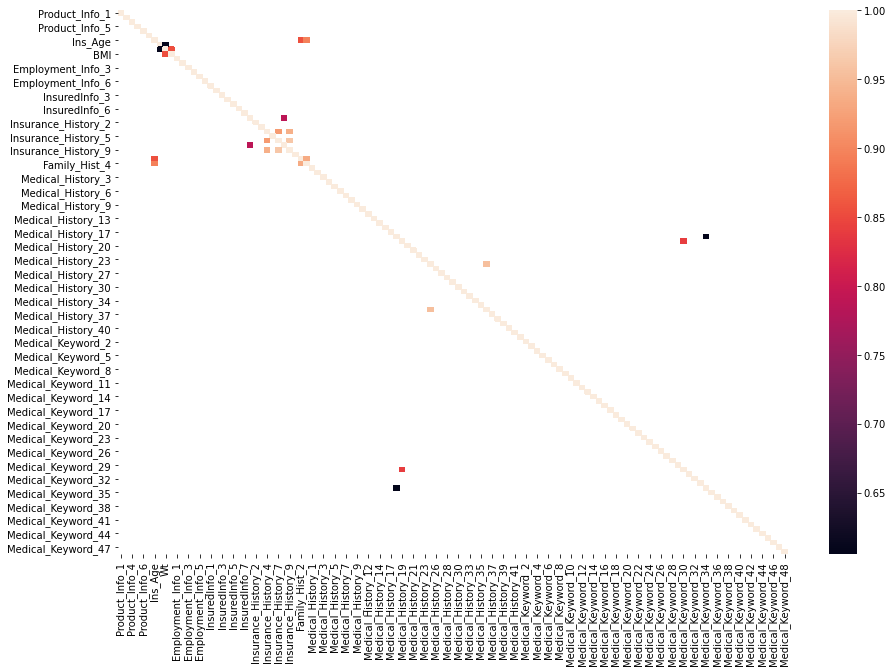

In [34]:
#HeatMap for corr_above_60
fig = plt.figure(figsize=(15, 10))
ax = sns.heatmap(corr_above_60)
#Age and BMI are highly correlated, also some insurance _history features are highly correlated

<h2>&#9635; Filling Null Values</h2>

In [9]:
# Filling remaining missing values with mean of each feature
train_df = train_df.fillna(train_df.mean())
#check there is any null values
sum(train_df.isnull().sum())

0

<h2>&#9635; Get dummies variables</h2>

In [10]:
#Get dummies variables for column Product_Info_2
train_df_dummies = pd.get_dummies(train_df, columns = ['Product_Info_2'])

In [11]:
#Train-set split
X_train, X_test, y_train, y_test = train_test_split(train_df_dummies,target,test_size = 0.25, random_state=1988)
print("X_train shape is: {}".format(X_train.shape))
print("y_train shape is: {}".format(y_train.shape))
print("X_test shape is: {}".format(X_test.shape))
print("y_test shape is: {}".format(y_test.shape))

X_train shape is: (44535, 144)
y_train shape is: (44535, 1)
X_test shape is: (14846, 144)
y_test shape is: (14846, 1)


<h2>&#9635; Random Over Sampling</h2>

In [12]:
#Oversampling train to get same amnount of labels 

ros = RandomOverSampler(random_state=1988)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train shape is: (44535, 144)
y_train shape is: (44535, 1)
X_resampled shape is: (116624, 144)
y_resampled shape is: (116624, 1)


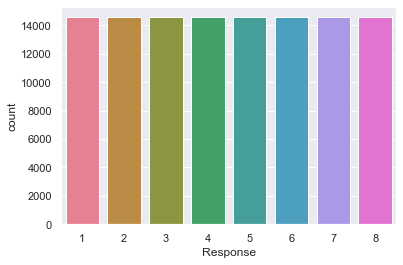

In [13]:
#check if re-sample works
print("X_train shape is: {}".format(X_train.shape))
print("y_train shape is: {}".format(y_train.shape))
print("X_resampled shape is: {}".format(X_resampled.shape))
print("y_resampled shape is: {}".format(y_resampled.shape))

#Histogram of y_resample
sns.set(style="darkgrid")
sns.countplot(y_resampled['Response'], palette="husl")

<h2>&#9635; Scores Function</h2>

In [69]:
#Function to get scores from Classification algorithms
def score(model,X,y,X_test,y_test):
    model = model
    model.fit(X, y)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

<h2>&#9635; K-Nearest Neighbors</h2>

In [62]:
for n in range(3,9,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_resampled, y_resampled)
    y_pred = knn.predict(X_test)
    print("Accuracy score with {} neighbors is:{}".format(n,accuracy_score(y_pred, y_test)))

Accuracy score with 3 neighbors is:0.26599757510440525
Accuracy score with 5 neighbors is:0.24040145493735687
Accuracy score with 7 neighbors is:0.23676411154519736


<p>k-Nearest Neighbors has a very bad performance and decreases when adding more neighbors</p>

<h2>&#9635; Naive Bayes</h2>

In [47]:
#Fitting a Naive-Bayes model to the data
gnb = GaussianNB()
gnb.fit(X_resampled, y_resampled)
y_pred = gnb.predict(X_test)
print("Accuracy score is: {}".format(accuracy_score(y_pred, y_test)))

Accuracy score is: 0.34568233867708476


<p>Naive Bayes perform better than k-Nearest Neighbors but the accuracy is very low</p>

<h2>&#9635; Logistic Regression</h2>

In [39]:
# perparameter Grid
lr_parameters = {
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'C' : [1.0, 0.1, 0.01]
}
model = LogisticRegression()
lr_gs = GridSearchCV(model, lr_parameters,cv=5,scoring=['f1','recall','accuracy'], n_jobs=-1,refit ='recall')
lr_gs.fit(X_resampled, y_resampled)
lr_gs.best_params_

KeyboardInterrupt: 

In [52]:
#Obtain the classification report the best combination of parameters
best_lr_model = LogisticRegression(C= 1, penalty= 'l2', solver='lbfgs')
score(best_lr_model,X_resampled,y_resampled,X_test,y_test)

              precision    recall  f1-score   support

           1       0.17      0.38      0.23      1597
           2       0.20      0.09      0.12      1614
           3       0.18      0.63      0.28       232
           4       0.21      0.34      0.26       389
           5       0.12      0.05      0.07      1382
           6       0.28      0.25      0.26      2737
           7       0.19      0.25      0.21      1984
           8       0.52      0.37      0.44      4911

    accuracy                           0.28     14846
   macro avg       0.23      0.29      0.23     14846
weighted avg       0.31      0.28      0.28     14846



<p>model is fairly good with label 8 but very bad with the rest of labels</p>

<h2>&#9635; Random Forest</h2>

In [44]:
# perparameter Grid
rf_parameters = {'n_estimators' : [3,5,10],
                 'max_depth' : [4,6,8]
                  }

model = RandomForestClassifier()
rf_gs = GridSearchCV(model, rf_parameters,cv=5,scoring=['f1','recall','accuracy'], n_jobs=-1,refit ='recall')
rf_gs.fit(X_resampled, y_resampled)
rf_gs.best_params_

{'max_depth': 4, 'n_estimators': 10}

In [54]:
#Obtain the classification report the best combination of parameters
best_rf_model = RandomForestClassifier(max_depth= 4, n_estimators= 10)
score(best_rf_model,X_resampled,y_resampled,X_test,y_test)

              precision    recall  f1-score   support

           1       0.28      0.20      0.24      1597
           2       0.33      0.11      0.16      1614
           3       0.21      0.45      0.29       232
           4       0.38      0.73      0.50       389
           5       0.36      0.55      0.44      1382
           6       0.38      0.24      0.30      2737
           7       0.30      0.27      0.29      1984
           8       0.60      0.77      0.67      4911

    accuracy                           0.45     14846
   macro avg       0.36      0.42      0.36     14846
weighted avg       0.42      0.45      0.42     14846



<p>model improves againts logistic regression on each label and weighted average</p>

<h2>&#9635; Gradient Boosting</h2>

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
# Hyperparameter Grid
gb_parameters ={'n_estimators':[5,10,20,50],
                'max_depth':[1,3,5,7],
                'learning_rate':[0.01,0.1,1]
                }

model = GradientBoostingClassifier()
gb_gs = GridSearchCV(model, gb_parameters,cv=5,scoring=['f1','recall','accuracy'], n_jobs=-1,refit ='recall')
gb_gs.fit(X_resampled, y_resampled)
gb_gs.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}

In [47]:
#Obtain the classification report the best combination of parameters
best_gb_model = GradientBoostingClassifier(learning_rate = 0.01, max_depth= 1, n_estimators= 5)
score(best_gb_model,X_resampled,y_resampled,X_test,y_test)

              precision    recall  f1-score   support

           1       0.20      0.18      0.19      1597
           2       0.47      0.14      0.21      1614
           3       0.24      0.78      0.37       232
           4       0.00      0.00      0.00       389
           5       0.36      0.46      0.40      1382
           6       0.54      0.02      0.04      2737
           7       0.25      0.40      0.31      1984
           8       0.56      0.81      0.66      4911

    accuracy                           0.42     14846
   macro avg       0.33      0.35      0.27     14846
weighted avg       0.43      0.42      0.36     14846



<h2>&#9635; XGB</h2>

In [49]:
from xgboost import XGBClassifier
# perparameter Grid
xgb_parameters = {'n_estimators': [2,5,10], 
                  'max_depth': [1,3,5], 
                  'learning_rate':[0.01,0.1,1]
                 }

model = XGBClassifier()
xgb_gs = GridSearchCV(model, gb_parameters,cv=5,scoring=['f1','recall','accuracy'], n_jobs=-1,refit ='recall')
xgb_gs.fit(X_resampled, y_resampled)
xgb_gs.best_params_

[08:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}

In [50]:
#Obtain the classification report the best combination of parameters
best_xgb_model = XGBClassifier(learning_rate= 0.01, max_depth = 1, n_estimators= 5)
score(best_xgb_model,X_resampled,y_resampled,X_test,y_test)

[09:03:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.20      0.18      0.19      1597
           2       0.47      0.14      0.21      1614
           3       0.24      0.78      0.37       232
           4       0.00      0.00      0.00       389
           5       0.36      0.46      0.40      1382
           6       0.53      0.02      0.04      2737
           7       0.26      0.32      0.29      1984
           8       0.54      0.87      0.67      4911

    accuracy                           0.42     14846
   macro avg       0.33      0.35      0.27     14846
weighted avg       0.42      0.42      0.35     14846



<h2>&#9635; Max Voting Model</h2>

In [55]:
# Appending all the models to estimators list
models = [['logistic', best_lr_model],
          ['rf', best_rf_model],
          ['gb', best_gb_model],
          ['xgb', best_xgb_model]
         ]
# Voting for the best model
voting_model = VotingClassifier(models, voting='soft')

voting_model.fit(X_resampled, y_resampled)

[09:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[['logistic', LogisticRegression(C=1)],
                             ['rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=10)],
                             ['gb',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=1,
                                                         n_estimators=5)],
                             ['xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,...
                                            interaction_constraints='',
                                      

In [70]:
score(voting_model,X_resampled,y_resampled,X_test,y_test)

[10:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.23      0.28      0.25      1597
           2       0.35      0.13      0.19      1614
           3       0.22      0.54      0.32       232
           4       0.29      0.74      0.42       389
           5       0.45      0.47      0.46      1382
           6       0.41      0.24      0.30      2737
           7       0.28      0.29      0.28      1984
           8       0.62      0.71      0.66      4911

    accuracy                           0.43     14846
   macro avg       0.36      0.43      0.36     14846
weighted avg       0.43      0.43      0.42     14846



In [97]:
 Classification_report_list = [[0.23,0.28,0.25],
                                [0.35,0.13,0.19],
                                [0.22,0.54,0.32],
                                [0.29,0.74,0.42],
                                [0.45,0.47,0.46],
                                [0.41,0.24,0.30],
                                [0.28,0.29,0.28],
                                [0.62,0.71,0.66]
                             ]

In [99]:
Classification_report = pd.DataFrame(Classification_report_list,index = ['1', '2', '3', '4', '5', '6','7', '8'],
                                     columns = ['precision','recall','f1-score'])
Classification_report

precision  recall  f1-score
1       0.23    0.28      0.25
2       0.35    0.13      0.19
3       0.22    0.54      0.32
4       0.29    0.74      0.42
5       0.45    0.47      0.46
6       0.41    0.24      0.30
7       0.28    0.29      0.28
8       0.62    0.71      0.66

Text(111.5, 0.5, 'Classes')

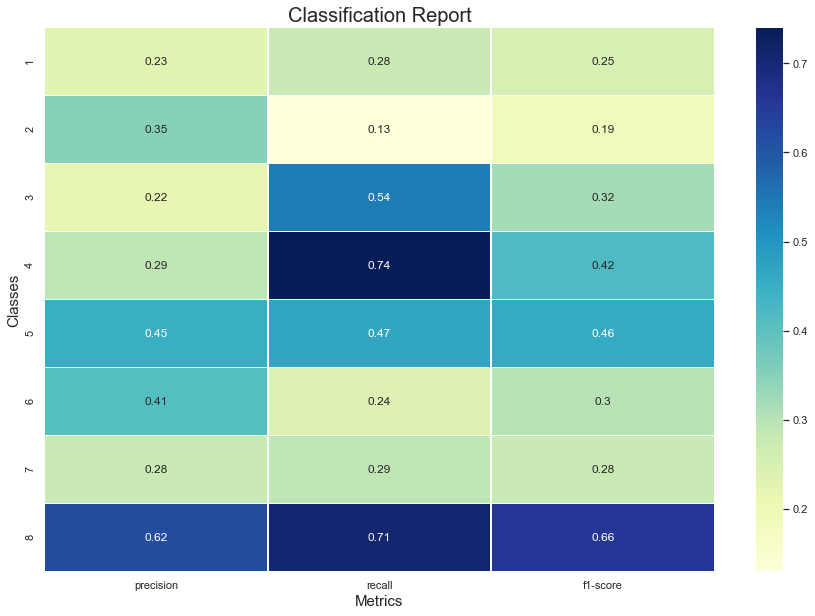

In [151]:
fig = plt.figure(figsize=(15, 10))
ax = sns.heatmap(Classification_report,linewidths=.5,cmap="YlGnBu",annot=True)
ax.set_title('Classification Report',fontsize = 20)
ax.set_xlabel('Metrics', fontsize = 15)
ax.set_ylabel('Classes', fontsize = 15)

<h2>&#9635; Testing DataSet</h2>

In [150]:
#drop features not use in train set
drop_list_test = ['Id'] + empty_features
test_df = test_df_raw.drop(drop_list_test,axis=1)
test_df.shape

(19765, 120)

In [117]:
#Filling na
test_df = train_df.fillna(test_df.mean())
#Get dummies variables for column Product_Info_2
test_df_dummies = pd.get_dummies(test_df, columns = ['Product_Info_2'])
test_df_dummies.shape

(59381, 144)

In [118]:
#Apply model to test data
y_test_predict = voting_model.predict(test_df_dummies)

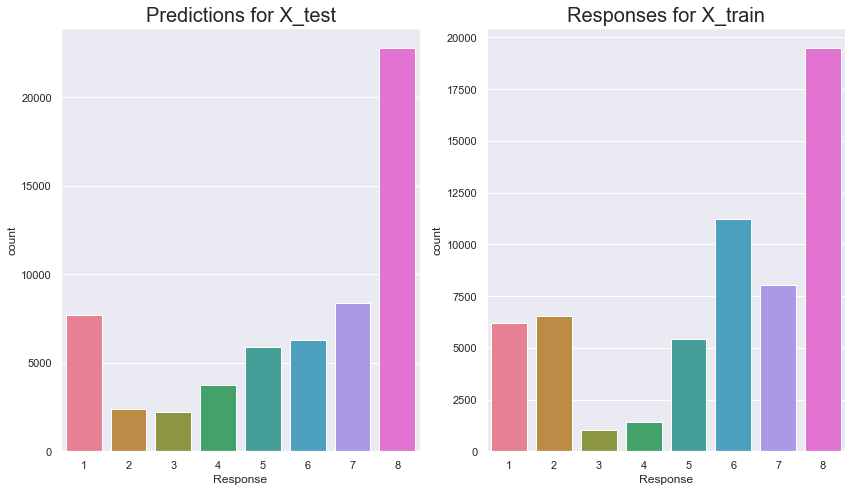

In [152]:
#Ploting predictions
fig = plt.figure(figsize=(12, 7))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
ax = sns.countplot(y_test_predict, palette="husl")
ax.set_title('Predictions for X_test',fontsize = 20)
ax.set_xlabel('Response')
plt.subplot(1, 2, 2)
ax2 = sns.countplot(target['Response'], palette="husl")
ax2.set_title('Responses for X_train',fontsize = 20)
plt.tight_layout();
#Response 8 has highest values and 3 and 4 have the least, and oversampling could be performed to balance the data 

<h2>&#9635; Conclusion</h2>

<p>Voting model gives the best result, nevertheless, the accuracy of the model and the rest of metrics can not give you any confidence to use this model for prediction, maybe just for label 8 </p> 